In [1]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler, StandardScaler # min/max scaling
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm
from MAPseq_processing import * # import all functions from this script
from MAPseq_plotting import * # import all functions from this script
import matplotlib.lines as mlines # needed for custom legend
import matplotlib.font_manager as fm # needed to export editable text
from scipy import stats
import random

# needed for editable text in svg format
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['text.usetex'] = False

plt.rcParams['svg.fonttype'] = 'none'


# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

In [2]:
# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
# out_path = '/Volumes/Data/Emily/figures/fig_2_mapseq/figure_pics/'
out_path = "/Users/eisko/Documents/CSHL/mapseq_paper/svg_images/"

In [3]:
# #### load data
aca_bin = pd.read_pickle(in_path+"M194_M220_ACA_bin4.pkl")

# #### load data
aca_countN = pd.read_pickle(in_path+"M194_M220_ACA_countN4.pkl")


# Data Processing

In [4]:
# initial processing
# bin processing
aca_clean = [clean_up_data(df, to_drop=["OB", "OMCi", "OMCc", "HIP"], inj_site="ACAi") for df in aca_bin]
aca_type = [sort_by_celltype(df, it_areas=["ACAc", "AUD", "STR"]) for df in aca_clean]
aca_preprocess = dfs_preprocess_counts(aca_type, norm_by="inj_median", inj_site="ACAi") # normalize by injection median

# countN processing
aca_cleanN = [clean_up_data(df, to_drop=["OB", "OMCi", "OMCc", "HIP"], inj_site="ACAi") for df in aca_countN]
aca_typeN = [sort_by_celltype(df, it_areas=["ACAc", "AUD", "STR"]) for df in aca_cleanN]
aca_preprocessN = dfs_preprocess_counts(aca_typeN, norm_by="inj_median", inj_site="ACAi") # normalize by injection median



# Infectivity

In [22]:
infect_df = pd.DataFrame(columns=["Unique Barcodes", "mice", "species", "dataset"])

for i in range(metadata.shape[0]):
    infect_df.loc[i,"Unique Barcodes"] = aca_type[i].shape[0]
    infect_df.loc[i, "mice"] = metadata.loc[i,"mice"]
    infect_df.loc[i,"species"] = metadata.loc[i, "species"]
    infect_df.loc[i, "dataset"] = metadata.loc[i, "dataset"]

print(infect_df["Unique Barcodes"].max())
print(infect_df["Unique Barcodes"].min())

44667
644


/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:198: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(data=df, x="species", y=to_plot, hue="species", units='mice',


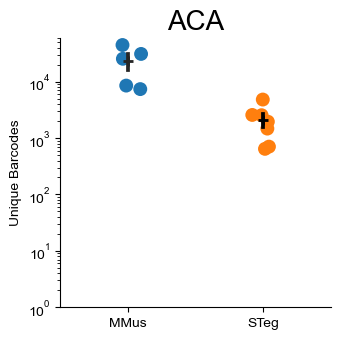

In [33]:

dot_plot(infect_df, to_plot="Unique Barcodes", title="ACA")
plt.yscale("log")
plt.ylim(1, 60000)
plt.savefig(out_path+"infectivity_uBC_dotplot_ACA.svg", dpi=300, bbox_inches="tight")
plt.show()

# Heatmaps

## individual animal - USED THIS ONE FOR FIGURE
- Made sure to plot normalized barcode (normalized by injection median)
- plotted individual neurons on same axes

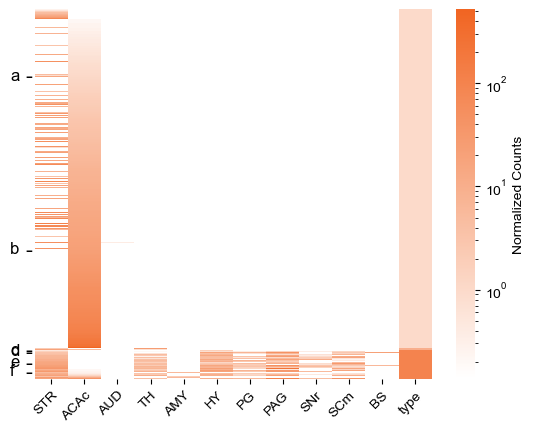

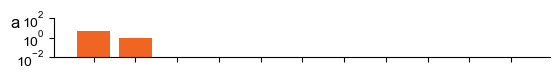

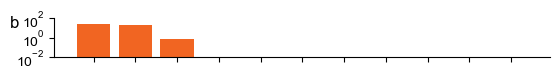

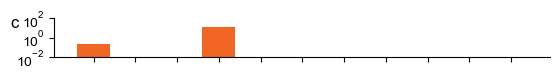

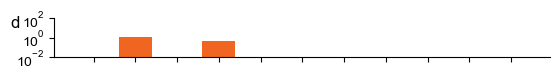

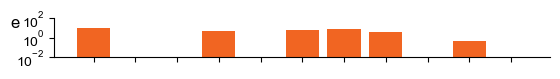

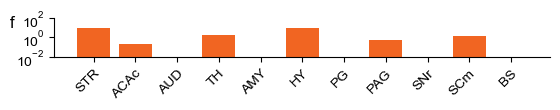

In [101]:
# plot STF6 only, mice[10] - plot only 1000 neurons sample
i=10

plot_order = ["STR","ACAc", "AUD", "TH", "AMY", "HY", "PG", 
              "PAG", "SNr", "SCm", "BS", "type"]
sort_order = ['type', 'ACAc', 'AUD',  'STR', 'TH', 'AMY', 
              'HY', 'SNr', 'SCm', 'PG', 'PAG','BS']
neurons = {"a":175, "b":644, "c":916, "d":920, "e":950, "f":975}

plot_df, fig = sorted_heatmap(aca_preprocessN[i], sort_by=sort_order, sort_ascend=True, title="",
                              drop=[], cmap=orange_cmp, label_neurons=neurons, log=True,
                              cbar=True, col_order=plot_order, nsample=1000)


# rotate xtick labels 45 degrees
plt.xticks(rotation=45,ha='right', rotation_mode='anchor')

# set cbar label
ax = plt.gca()
ax.collections[0].colorbar.set_label("Normalized Counts")

plt.savefig(out_path+"ACA_heatmap_mapseq_STF6.svg", dpi=300, bbox_inches="tight")
plt.show()

for key in neurons:
      #  plot = aca_preprocessN[i][plot_order]
       single_neuron_bar(plot_df, neurons[key], label=key, sort_by=[], cmap=orange_cmp, 
                         col_order=plot_order[:-1], row_norm=False, drop=["type"],
                         ylim=[0.01, 100], ylog=True)
       if key=="f":
             plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
       else:
             plt.tick_params(labelbottom=False)
       plt.savefig(out_path+"ACA_heatmap_mapseq_STF6"+"neuron_"+key+".svg", dpi=300, bbox_inches="tight")
       plt.show()
       

### MMus

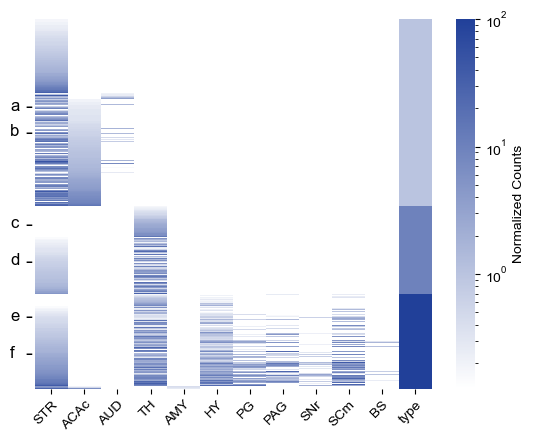

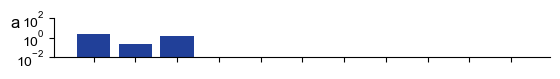

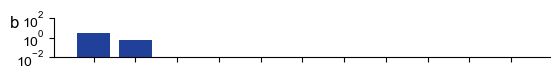

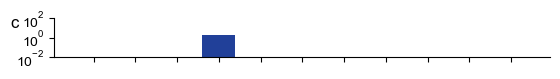

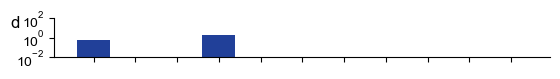

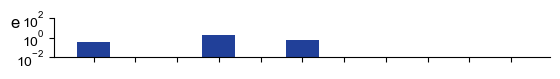

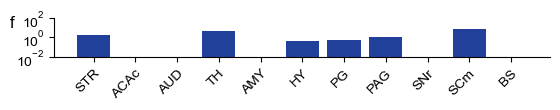

In [113]:
# plot MMM4 only, mice[6] - plot only 1000 neurons sample
i=6

plot_order = ["STR","ACAc", "AUD", "TH", "AMY", "HY", "PG", 
              "PAG", "SNr", "SCm", "BS", "type"]
sort_order = ['type', 'ACAc', 'AUD',  'STR', 'TH', 'AMY', 
              'HY', 'SNr', 'SCm', 'PG', 'PAG','BS']
neurons = {"a":231, "b":300, "c":550, "d":650, "e":800, "f":900}

plot_df, fig = sorted_heatmap(aca_preprocessN[i], sort_by=sort_order, sort_ascend=True, title="",
                              drop=[], cmap=blue_cmp, label_neurons=neurons, log=True,
                              cbar=True, col_order=plot_order, nsample=1000)


# rotate xtick labels 45 degrees
plt.xticks(rotation=45,ha='right', rotation_mode='anchor')

# set cbar label
ax = plt.gca()
ax.collections[0].colorbar.set_label("Normalized Counts")

plt.savefig(out_path+"ACA_heatmap_mapseq_MMM4.svg", dpi=300, bbox_inches="tight")
plt.show()

for key in neurons:
       single_neuron_bar(plot_df, neurons[key], label=key, sort_by=[], cmap=blue_cmp, 
                         col_order=plot_order[:-1], row_norm=False, drop=["type"],
                         ylim=[0.01, 100], ylog=True)
       if key=="f":
             plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
       else:
             plt.tick_params(labelbottom=False)
       plt.savefig(out_path+"ACA_heatmap_mapseq_MMM4"+"neuron_"+key+".svg", dpi=300, bbox_inches="tight")
       plt.show()
       

# Dot Plots

# Without downsampled propotion plots

In [117]:
# processing
plot_it = ["AUD", "ACAc"]
plot_pt = ["PAG", "SNr"]

# IT cells
aca_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in aca_type]
aca_it_prop = dfs_to_proportions(aca_it, cell_type="IT", drop=["ACAi", "type"], inj_site="ACAi")

# PT cells
aca_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in aca_type]
aca_pt_prop = dfs_to_proportions(aca_pt, cell_type="PT", aud_rename=False, drop=["ACAi", "type"], inj_site="ACAi")

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:289: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, df_add])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:289: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, df_add])


/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:205: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  plt.setp(ax.collections, zorder=100, label="")


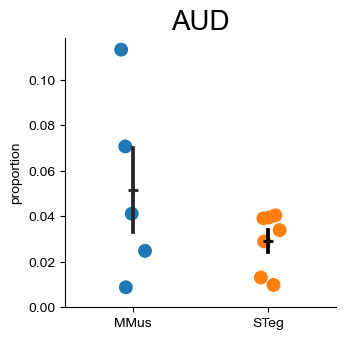

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:205: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  plt.setp(ax.collections, zorder=100, label="")


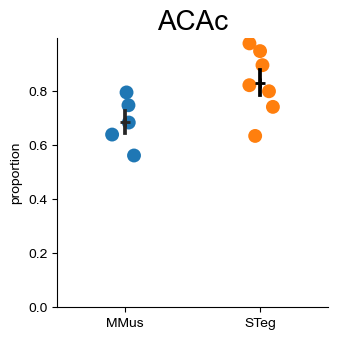

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:205: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  plt.setp(ax.collections, zorder=100, label="")


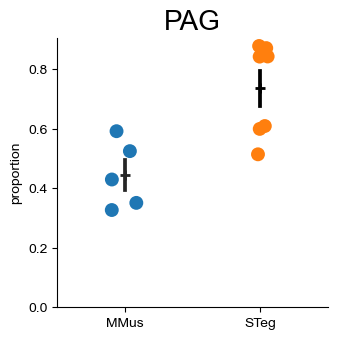

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:205: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  plt.setp(ax.collections, zorder=100, label="")


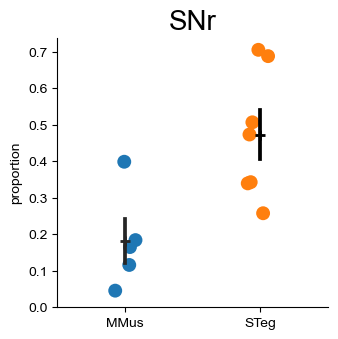

In [118]:

# AUD
dot_plot(aca_it_prop, "AUD", title="AUD", add_legend=False)
plt.savefig(out_path+"ACA_AUD_dot.svg", dpi=300, bbox_inches="tight")
plt.show()

# ACAc
dot_plot(aca_it_prop, "ACAc", title="ACAc", add_legend=False)
plt.savefig(out_path+"ACA_ACAc_dot.svg", dpi=300, bbox_inches="tight")
plt.show()

# PAG
dot_plot(aca_pt_prop, "PAG", title="PAG", add_legend=False)
plt.savefig(out_path+"ACA_PAG_dot.svg", dpi=300, bbox_inches="tight")
plt.show()

# SNr
dot_plot(aca_pt_prop, "SNr", title="SNr", add_legend=False)
plt.savefig(out_path+"ACA_SNr_dot.svg", dpi=300, bbox_inches="tight")
plt.show()

## Add down Sampled lab and singing mouse
- sample from aggregated dataset, with replacement b/w 'animals'

In [124]:
# processing

# IT cells
aca_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in aca_type]
aca_it_prop = dfs_to_proportions(aca_it, cell_type="IT", )

mm_it_sim = resample_neurons(aca_it, species="MMus")
mm_it_sim_prop = dfs_to_proportions(mm_it_sim, cell_type="IT")
mm_it_sim_prop['species'] = "MMus_resampled"

st_it_sim = resample_neurons(aca_it, species="STeg")
st_it_sim_prop = dfs_to_proportions(st_it_sim, cell_type="IT")
st_it_sim_prop['species'] = "STeg_resampled"

# PT cells
aca_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in aca_type]
aca_pt_prop = dfs_to_proportions(aca_pt, cell_type="PT", aud_rename=False)

mm_pt_sim = resample_neurons(aca_pt, species="MMus")
mm_pt_sim_prop = dfs_to_proportions(mm_pt_sim, cell_type="PT", aud_rename=False)
mm_pt_sim_prop['species'] = "MMus_resampled"

st_pt_sim = resample_neurons(aca_pt, species="STeg")
st_pt_sim_prop = dfs_to_proportions(st_pt_sim, cell_type="PT", aud_rename=False)
st_pt_sim_prop['species'] = "STeg_resampled"

plot_it = pd.concat([aca_it_prop, mm_it_sim_prop, st_it_sim_prop])
plot_pt = pd.concat([aca_pt_prop, mm_pt_sim_prop, st_pt_sim_prop])

KeyError: "['OMCi'] not found in axis"

In [ ]:
# AUD
dot_plot_resample(plot_it, "AUD", title="AUD", add_legend=False)
plt.savefig(out_path+"ACA_AUD_resample_dot.svg", dpi=300, bbox_inches="tight")
plt.show()

# ACAc
dot_plot_resample(plot_it, "ACAc", title="ACAc", add_legend=False)
plt.savefig(out_path+"ACA_ACAc_resample_dot.svg", dpi=300, bbox_inches="tight")
plt.show()

# PAG
dot_plot_resample(plot_pt, "PAG", title="PAG", add_legend=False)
plt.savefig(out_path+"ACA_PAG_resample_dot.svg", dpi=300, bbox_inches="tight")
plt.show()

# SNr
dot_plot_resample(plot_pt, "SNr", title="SNr", add_legend=False)
plt.savefig(out_path+"ACA_SNr_resample_dot.svg", dpi=300, bbox_inches="tight")
plt.show()

# Downsample and plot histograms

- in following, concatenate all neurons, select (e.g. 300) to get sample proportion

In [ ]:
# 1. find smallest neuron size recovered for STeg/MMus
for i in range(metadata.shape[0]):
    print(metadata.loc[i,"mice"], "neurons:", aca_it[i].shape[0])

In [ ]:
# note: smallest it population is STF3 ~300 neurons
# randomly sample 300 neurons from MMM1
j=0
reps = [100, 200, 300, 500, 850, 1000, 5000, 10000]
n_neurons = 300
random_state=10
df = aca_it[j].copy()
sampled_list = []

fig, axs = plt.subplots(2,4, figsize=(20,10))

ri = 0
for ax in axs.flat:
    r = reps[ri]

    for i in range(r):
        sample = df.sample(n_neurons, random_state=random_state+i) # can't have same random_state for every round or will sample the same neurons
        sampled_list.append(sample)

    df_acac = [df.sum()["ACAc"] for df in sampled_list]
    df_acac = np.array(df_acac)/n_neurons

    ax.hist(df_acac)
    ax.set_title("n="+str(r), size=18, loc="left")
    ax.set_title("mean: "+str(round(df_acac.mean(),3))+", "+
                "std: "+str(round(df_acac.std(),3)),
                loc="right")
    
    ri+=1
plt.show()
# convert to proportions

# plot in histogram

In [ ]:
reps = 1000
n_neurons = 300
random_state=10
area = "ACAc"

fig, axs = plt.subplots(3,4, figsize=(20,15))

for i in range(metadata.shape[0]):
    df = aca_it[i].copy()
    ax = axs.flat[i]

    sampled_list = []
    for j in range(reps):
        sample = df.sample(n_neurons, random_state=random_state+j) # can't have same random_state for every round or will sample the same neurons
        sampled_list.append(sample)

    df_area = [dfi.sum()[area] for dfi in sampled_list]
    df_area = np.array(df_area)/n_neurons

    if metadata.loc[i,"species"]=="MMus":
        ax.hist(df_area, color="tab:blue")
    else:
        ax.hist(df_area, color="tab:orange")
    ax.set_title(area+" - "+metadata.loc[i,'mice'], loc="left", size=16)
    ax.set_title("mean: "+str(round(df_area.mean(),3))+", "+
                "std: "+str(round(df_area.std(),3)),
                loc="right")

    # add line for observed value
    obs = [dfit.sum()[area]/dfit.shape[0] for dfit in aca_it]
    for k in range(metadata.shape[0]):
        if metadata.loc[k,"species"]=="STeg":
            ax.axvline(x=obs[k], color="orange")
            ax.text(obs[k], y=1, s=metadata.loc[i,"mice"], color="orange")
        else:
            ax.axvline(x=obs[k], color="blue")
            ax.text(obs[k], y=1, s=metadata.loc[k,"mice"], color="blue")

plt.show()

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF # for generating cdfs



In [ ]:

# convert to cdf, so can plot everything together
reps = 1000
n_neurons = 300
random_state=10
area = "ACAc"

# fig, axs = plt.subplots(3,4, figsize=(20,15))
ecdfs = []
maxs = []
mins = []
obs = []

for i in range(metadata.shape[0]):

    df = aca_it[i].copy()

    sampled_list = []
    for j in range(reps):
        sample = df.sample(n_neurons, random_state=random_state+j) # can't have same random_state for every round or will sample the same neurons
        sampled_list.append(sample)

    df_area = [dfi.sum()[area] for dfi in sampled_list]
    df_area = np.array(df_area)/n_neurons
    maxs.append(np.max(df_area))
    mins.append(np.min(df_area))

    # calculate ecdf based on sampled data
    ecdfs.append(ECDF(df_area))

    # keep track of observed proportions
    obs.append(df[area].sum()/df.shape[0])

# calc overall max/min
max_bound = max(maxs)
min_bound = min(mins)
# plot_df = pd.DataFrame(columns=["x", "cdf", "mice", "species"])

# x = np.logspace(np.log10(min_bound), np.log10(max_bound), num=reps)
x = np.linspace(min_bound, max_bound, num=reps)

for i in range(metadata.shape[0]):
    
    y = ecdfs[i](x)

    if metadata.loc[i,"species"] == "MMus":
        plt.plot(x, y, color="tab:blue")
        plt.plot(obs[i], ecdfs[i](obs[i]), marker="o", color="blue")
    else:
        plt.plot(x, y, color="tab:orange")
        plt.plot(obs[i], ecdfs[i](obs[i]), marker="o", color="orange")
    plt.text(obs[i], ecdfs[i](obs[i]), metadata.loc[0,"mice"])
plt.title(area)
plt.xlabel("proportion")
plt.ylabel("cdf")
plt.show()

In [ ]:

# convert to cdf, so can plot everything together
reps = 1000
n_neurons = 300
random_state=10
area = "AUD"

# fig, axs = plt.subplots(3,4, figsize=(20,15))
ecdfs = []
maxs = []
mins = []
obs = []

for i in range(metadata.shape[0]):

    df = aca_it[i].copy()

    sampled_list = []
    for j in range(reps):
        sample = df.sample(n_neurons, random_state=random_state+j) # can't have same random_state for every round or will sample the same neurons
        sampled_list.append(sample)

    df_area = [dfi.sum()[area] for dfi in sampled_list]
    df_area = np.array(df_area)/n_neurons
    maxs.append(np.max(df_area))
    mins.append(np.min(df_area))

    # calculate ecdf based on sampled data
    ecdfs.append(ECDF(df_area))

    # keep track of observed proportions
    obs.append(df[area].sum()/df.shape[0])

# calc overall max/min
max_bound = max(maxs)
min_bound = min(mins)
# plot_df = pd.DataFrame(columns=["x", "cdf", "mice", "species"])

# x = np.logspace(np.log10(min_bound+0.01), np.log10(max_bound), num=reps)
x = np.linspace(min_bound, max_bound, num=reps)

for i in range(metadata.shape[0]):
    
    y = ecdfs[i](x)

    if metadata.loc[i,"species"] == "MMus":
        plt.plot(x, y, color="tab:blue")
        plt.plot(obs[i], ecdfs[i](obs[i]), marker="o", color="blue")
    else:
        plt.plot(x, y, color="tab:orange")
        plt.plot(obs[i], ecdfs[i](obs[i]), marker="o", color="orange")
    plt.text(obs[i], ecdfs[i](obs[i]), metadata.loc[0,"mice"])
plt.title(area)
plt.xlabel("proportion")
plt.ylabel("cdf")
plt.show()

In [ ]:


plot_df, ecdfs = dfs_to_cdf_proportions(aca_it, ["ACAc", "AUD"])

# plot cdfs using existing function
area = "ACAc"
plot_cdf(plot_df, plot_areas=[area], calc_cdf=False, fig_size=(5,5))
plt.xlabel("proportion")
plt.suptitle("")

# plot observed proportions
for i in range(metadata.shape[0]):
    df = aca_it[i].copy()
    obs = df[area].sum()/df.shape[0]
    ecdf = ecdfs[area][i]
    cdf = ecdf(obs)
    if metadata.loc[i,"species"]=="MMus":
        plt.plot(obs, cdf, color="blue", marker="o")
    else:
        plt.plot(obs, cdf, color="orange", marker="o")
    plt.text(obs, cdf, metadata.loc[i,"mice"])
    

plt.show()

In [ ]:
# plot cdfs using existing function
area = "AUD"
plot_cdf(plot_df, plot_areas=[area], calc_cdf=False, fig_size=(5,5))
plt.xlabel("proportion")
plt.suptitle("")

# plot observed proportions
for i in range(metadata.shape[0]):
    df = aca_it[i].copy()
    obs = df[area].sum()/df.shape[0]
    ecdf = ecdfs[area][i]
    cdf = ecdf(obs)
    if metadata.loc[i,"species"]=="MMus":
        plt.plot(obs, cdf, color="blue", marker="o")
    else:
        plt.plot(obs, cdf, color="orange", marker="o")
    plt.text(obs, cdf, metadata.loc[i,"mice"])
    

plt.show()

In [ ]:
for i in range(12):
    print(metadata.loc[i,"mice"], "neurons:", aca_pt[i].shape[0])

In [ ]:


plot_df, ecdfs = dfs_to_cdf_proportions(aca_pt, ["PAG", "SNr"], n_neurons=47)

# plot cdfs using existing function
area = "PAG"
plot_cdf(plot_df, plot_areas=[area], calc_cdf=False, fig_size=(5,5))
plt.xlabel("proportion")
plt.suptitle("")

# plot observed proportions
for i in range(metadata.shape[0]):
    df = aca_pt[i].copy()
    obs = df[area].sum()/df.shape[0]
    ecdf = ecdfs[area][i]
    cdf = ecdf(obs)
    if metadata.loc[i,"species"]=="MMus":
        plt.plot(obs, cdf, color="blue", marker="o")
    else:
        plt.plot(obs, cdf, color="orange", marker="o")
    plt.text(obs, cdf, metadata.loc[i,"mice"])
    

plt.show()
# plot cdfs using existing function
area = "SNr"
plot_cdf(plot_df, plot_areas=[area], calc_cdf=False, fig_size=(5,5))
plt.xlabel("proportion")
plt.suptitle("")

# plot observed proportions
for i in range(metadata.shape[0]):
    df = aca_pt[i].copy()
    obs = df[area].sum()/df.shape[0]
    ecdf = ecdfs[area][i]
    cdf = ecdf(obs)
    if metadata.loc[i,"species"]=="MMus":
        plt.plot(obs, cdf, color="blue", marker="o")
    else:
        plt.plot(obs, cdf, color="orange", marker="o")
    plt.text(obs, cdf, metadata.loc[i,"mice"])
    

plt.show()

# Intra vs. Inter comparisons

In [ ]:
d1 = proportion_comparisons(plot_it, species1="MMus", species2="STeg", label="inter")
d2 = proportion_comparisons(plot_it, species1="MMus", species2="MMus", label="intra")
d3 = proportion_comparisons(plot_it, species1="STeg", species2="STeg", label="intra")

result_it = pd.concat([d1, d2, d3])

inter_it = result_it[result_it['label']=="inter"]
intra_it = result_it[result_it['label']=="intra"]

d4 = proportion_comparisons(plot_pt, species1="MMus", species2="STeg", label="inter")
d5 = proportion_comparisons(plot_pt, species1="MMus", species2="MMus", label="intra")
d6 = proportion_comparisons(plot_pt, species1="STeg", species2="STeg", label="intra")

result_pt = pd.concat([d4, d5, d6])

inter_pt = result_pt[result_pt['label']=="inter"]
intra_pt = result_pt[result_pt['label']=="intra"]

# drop str in result_pt so no repeat areas b/w it and pt
result_pt = result_pt[result_pt['area']!="STR"]

result = pd.concat([result_it, result_pt])

# inter = result[result['label']=="inter"]
# intra = result[result['label']=="intra"]

result_means = result.groupby(['label', 'area']).mean().reset_index()
result_means

fig, ax = plt.subplots()
sns.pointplot(result_means, x="label", y="prop_diff", hue="area")
plt.title("ACA - MAPseq proportions")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(out_path+"inter_intra_paired_mapseq.jpg", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
from scipy.stats import ttest_rel

# do paired t-test = significant!
result_means_inter = result_means[result_means['label']=="inter"]
result_means_intra = result_means[result_means['label']=="intra"]

ttest_rel(result_means_inter['prop_diff'], result_means_intra['prop_diff'])

# Compare proportions

## Scatterplots

In [119]:
# preprocess
plot_it['type'] = "IT"
plot_pt['type'] = "PT"


TypeError: list indices must be integers or slices, not str

In [ ]:
# combine IT and PT
sp_stats_it = stvmm_calc_stats(plot_it, species=["STeg", "MMus"])
sp_stats_pt = stvmm_calc_stats(plot_pt, species=["STeg", "MMus"])

sp_stats = pd.concat([sp_stats_it,sp_stats_pt])

stvmm_area_scatter_type(sp_stats, title="ACA")
# plt.savefig(out_path+"ACA_scatter_mapseq_type.jpg", dpi=300, bbox_inches="tight")
plt.show()

## volcano plot

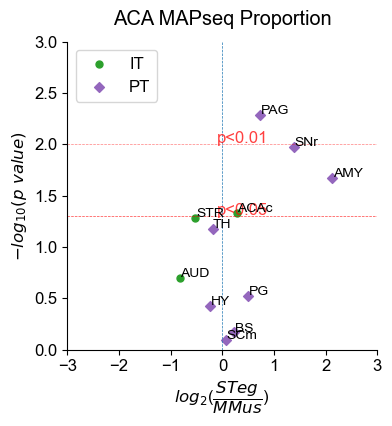

In [137]:
aca_it_prop['type']="IT"
aca_pt_prop['type']="PT"

aca_prop = pd.concat([aca_it_prop, aca_pt_prop])
plot = stvmm_calc_ttest(aca_prop, sp1="MMus", sp2="STeg")

plot_volcano(plot, title="ACA MAPseq Proportion", shape="type", ylim=(0,3), xlim=(-3,3))


# plt.savefig(out_path+"ACA_volcano_mapseq_type.svg", dpi=300, bbox_inches="tight")
plt.show()